# Lecture 4: Fourier Transforms in 1D


## Signal analysis and signal synthesis

Signal analysis and synthesis are foundational components of signal processing, with a wide variety of applications. These techniques can be described as follows


### Signal analysis: 
The original signal is analyzed by breaking down the signal into elementary components that describe the "characteristic properties" of this particular signal 

### Signal synthesis: 
If we know the elementary components of the original signal, how do we use these elementary components to reconstruct the  signal, or at least construct a reasonable approximation which is "close" to the original signal in some sense.

<span style="color:blue">_Over ther next few lectures, we will focus on the Fourier transform as a signal analysis tool, and the inverse Fourier transform as a signal synthesis tool._ </span>


In [28]:
# Imports etc
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

font = {'weight' : 'normal',
        'size'   : 20}

# Definition of the Fourier Transform
The Fourier Transform (FT) for a continuous signal $f(x)$ is defined as follows:
$$\hat{f}(u) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi x u} dx$$
Generally, this FT operation can be viewed as expressing a time-domain signal (if the variable $x$ corresponds to time) in terms of its temporal frequency components, or a spatial-domain signal in terms of its spatial frequency components. 


# Definition of the inverse Fourier Transform

The inverse Fourier Transform (iFT) can be expressed as follows: 
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(u)  e^{i 2 \pi x u} d u$$
which is essentially the same expression as the FT, except the sign on the exponential is flipped. 
The signals $f(x)$ and $\hat{f}(u)$ are referred to as a Fourier Transform pair. 


# What signals can we represent using the Fourier Transform? 

### Let's think about signals that are easy to decompose into sines and cosines (ie: complex exponentials of different frequencies)


### Let's think about signals that are difficult to decompose into sines and cosines (ie: complex exponentials of different frequencies)



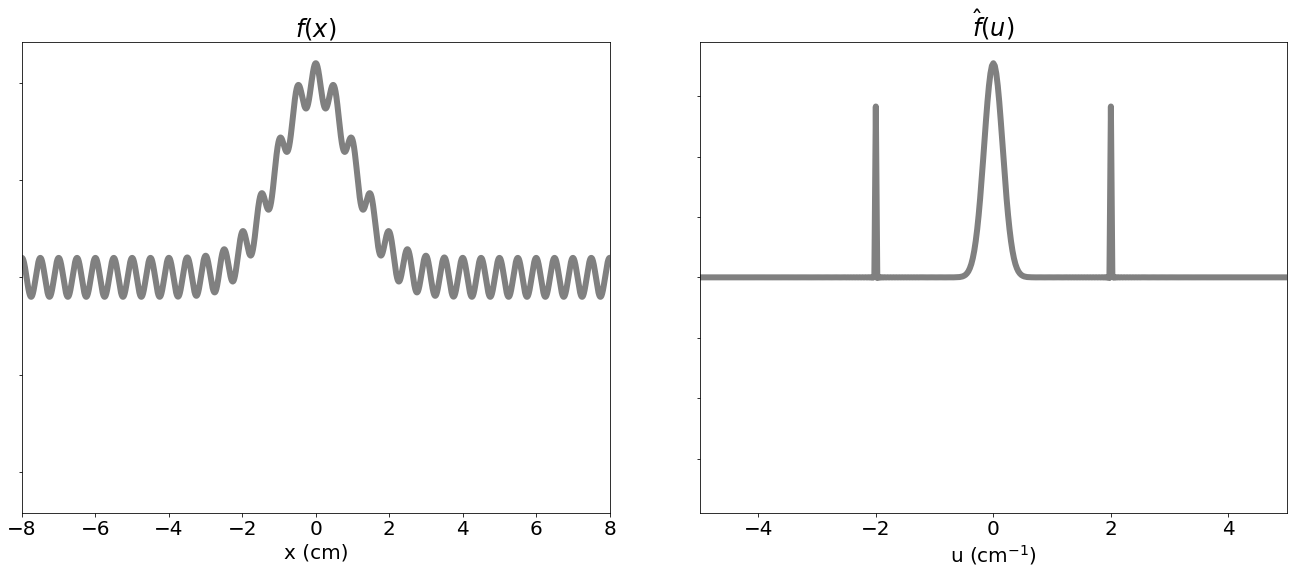

In [11]:
# Let's plot a signal and its FT
N = 20001
xmax = 20
x = np.linspace(-xmax,xmax,N)
dx = x[1] - x[0]
#f = 1.0*(np.exp(-x*x/2))
#f = np.cos(2*np.pi*0.6*x)
f = 1.0*(np.exp(-x*x/2)) + 0.1*np.cos(2*np.pi*2*x)


# Calculate a (discrete) Fourier transform
umax = 1/(2*dx)
u = np.linspace(-umax,umax,N)
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))/np.sqrt(len(f))


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)


# How to filter out noise/unwanted signals at specific frequencies? 

Suppose we have a signal with some desired features, plus some unwanted signal at specific frequencies - how to remove the unwanted signal? 


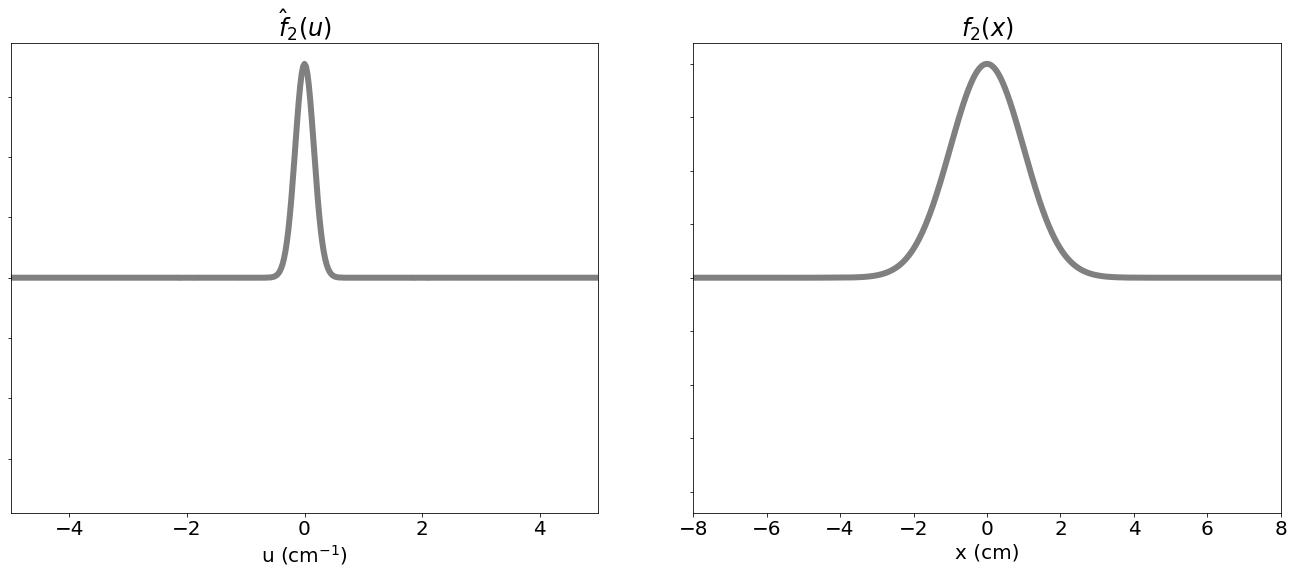

In [12]:
# Remove unwanted signal
u0 = 2 # Frequency to remove (both positive and negative frequency will be removed)
urange = 0.1 # Width of frequency range to remove
fhat2 = fhat.copy() # Make a copy of our signal's Fourier Transform
fhat2[abs(abs(u)-u0)<urange] = 0 # Zero-out the desired frequency ranges
f2 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat2)))*np.sqrt(len(f)) # Go back to spatial domain


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title('$\hat{f}_2(u)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')
plt.tight_layout(pad=4.0)




# Representing (non-smooth) sharp features with (smooth) sines and cosines

Signals with sharp features (eg: the rect function and many others) can be represented perfectly using the Fourier Transform. This somewhat counterintuitive property (the ability to represent non-smooth signals using only smooth "basis functions") requires infinitely high Fourier domain frequencies in order to represent sharp features. In other words, signals with sharp features in image space cannot be 'band-limited' in Fourier space, ie: have non-zero signal components over the entire (infinite) frequency range. 

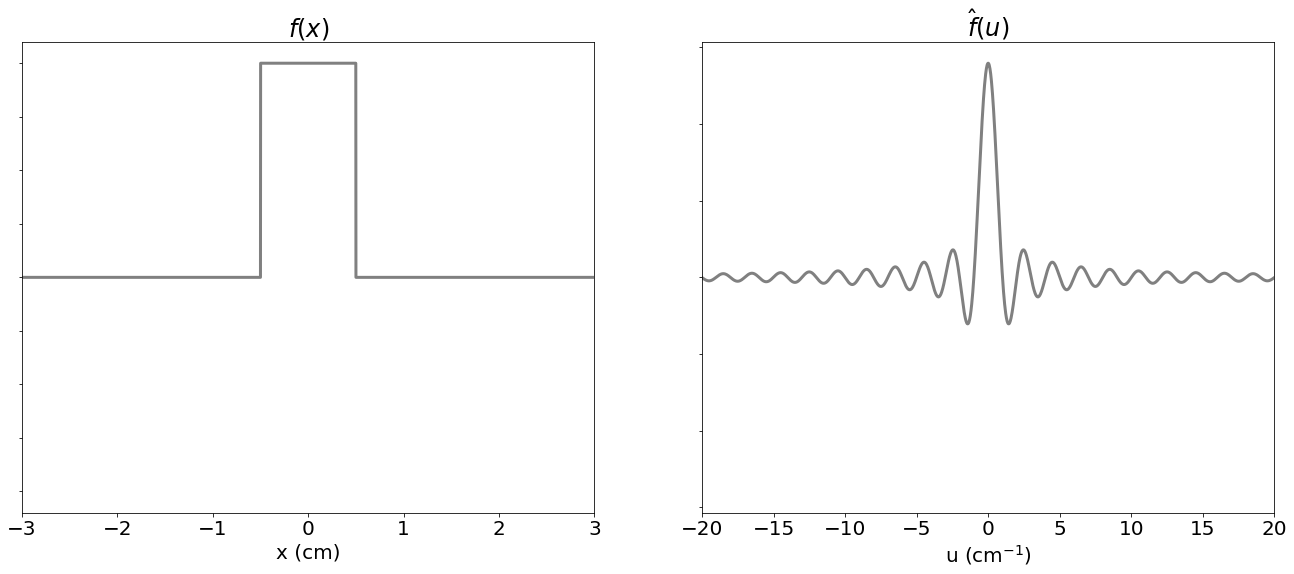

In [24]:
# Let's plot a signal and its FT
N = 50001
xmax = 20
x = np.linspace(-xmax,xmax,N)
dx = x[1] - x[0]
f = 1.0*(np.abs(x)<0.5)

# Calculate a (discrete) Fourier transform
umax = 1/(2*dx)
u = np.linspace(-umax,umax,N)
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))/np.sqrt(len(f))


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=3.0)
plt.axis([-3,3,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=3.0)
plt.axis([-20,20,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)



## What if we only have Fourier information up to some finite frequency?

It is illustrative to take a closer look at how a decomposition into sines and cosines such as the Fourier Transform can represent signals that are clearly non-sinusoidal. An intuitive way to think about it is to take a closer look at the expression for the inverse Fourier Transform, and limit it to a certain range of frequencies $[-B,B]$:
$$f_{B}(x) = \int_{-B}^{B} \hat{f}(u)  e^{i 2 \pi x u} d u$$

In this case, we can start out with a small value of $B$, and successively increase $B$ in order to approximate the full expression of our signal $f(x)$ in terms of $\hat{f}(u)$. This process is illustrated in next, for the specific case of a rect function. Note how the approximation becomes better and better as we increase $B$. Indeed, our approximated $f_B(x)$ becomes closer and closer to $f_B$ everywhere except near the sharp edges of the rect. This effect, known as Gibbs ringing, is a fundamental consequence of representing non-sinusoidal signals using sinusoids. Gibbs ringing extends easily to the multi-dimensional signal case, and has important implications for imaging. Some of these implications will be explored further throughout this course. 

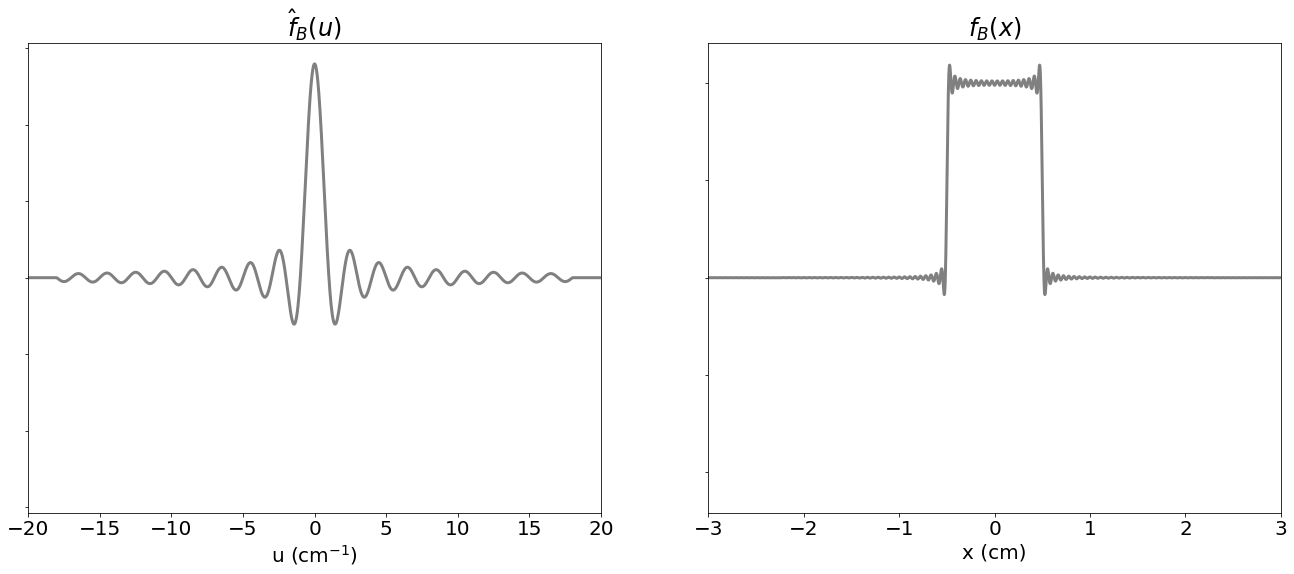

In [27]:
# Keep finite frequency range in Fourier domain, and go back to image space
B = 18 # Frequency to remove (both positive and negative frequency will be removed)
fhatB = fhat.copy() # Make a copy of our signal's Fourier Transform
fhatB[abs(abs(u))>B] = 0 # Zero-out high frequencies beyond +/-B
fB = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhatB)))*np.sqrt(len(f)) # Go back to spatial domain


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(u,np.real(fhatB),'gray',linewidth=3.0)
plt.axis([-20,20,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title('$\hat{f}_B(u)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(fB),'gray',linewidth=3.0)
plt.axis([-3,3,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_B(x)$')
plt.xlabel('x (cm)')
plt.tight_layout(pad=4.0)

